In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import fetch_openml

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import cv2
from collections import Counter

from PIL import Image


In [46]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()


In [47]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

C:\Users\musta\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [48]:
#print(mnist.DESCR)



In [49]:
print("Antal observationer (samples):", X.shape[0])
print("Antal variabler (features):", X.shape[1])


Antal observationer (samples): 70000
Antal variabler (features): 784


In [50]:
X_train = X[:5000]
y_train = y[:5000]
X_val = X[5000:6000]
y_val = y[5000:6000]

X_test = X[6000:7000]
y_test = y[6000:7000]

# Standardizing the data (as you generally always should do when using SVM models).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)   
X_test_scaled = scaler.transform(X_test)  

In [51]:
print(X_train.shape)
print(X_test.shape)
y_test.shape

(5000, 784)
(1000, 784)


(1000,)

In [52]:
# X_val.shape
y_train.shape
#y_test.shape
#y_val.shape


(5000,)

In [53]:
# Antal bilder i train
train_counts = Counter(y_train)

print("Antal bilder för varje siffra i träningsdatamängden:")
for digit, count in train_counts.items():
    print(f"Siffra {digit}: {count} bilder")

Antal bilder för varje siffra i träningsdatamängden:
Siffra 5: 434 bilder
Siffra 0: 479 bilder
Siffra 4: 535 bilder
Siffra 1: 563 bilder
Siffra 9: 495 bilder
Siffra 2: 488 bilder
Siffra 3: 493 bilder
Siffra 6: 501 bilder
Siffra 7: 550 bilder
Siffra 8: 462 bilder


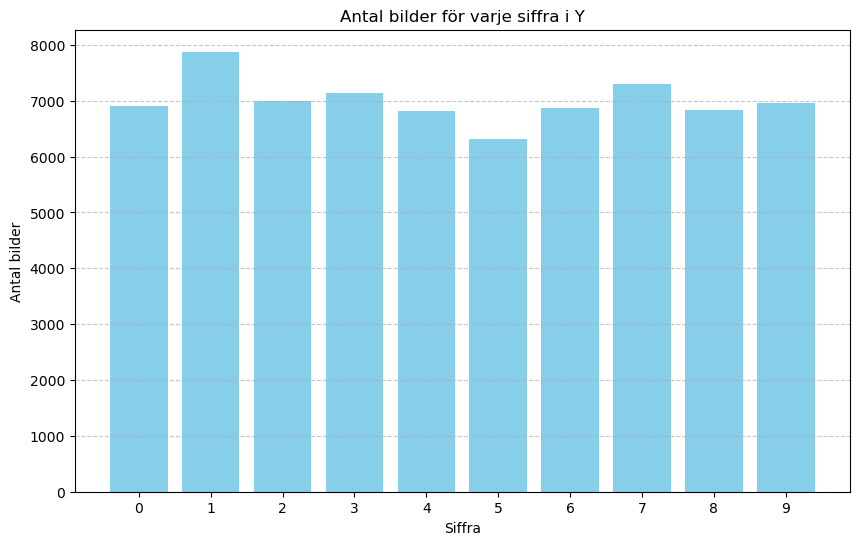

In [54]:
# Antal bilder 
train_counts = Counter(y)

sorted_counts = sorted(train_counts.items())
# Extrahera siffrorna och deras motsvarande antal bilder
digits, counts = zip(*sorted_counts)

# Skapa stapeldiagram
plt.figure(figsize=(10, 6))
plt.bar(digits, counts, color='skyblue')
plt.title('Antal bilder för varje siffra i Y')
plt.xlabel('Siffra')
plt.ylabel('Antal bilder')
plt.xticks(range(10)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [57]:
y_train = y_train.reshape(-1, 1)

In [58]:
# 1. Random Forest-modell
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_clf.fit(X_train, y_train)

# Utvärdera på valideringsdata
rf_val_predictions = random_forest_clf.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, rf_val_predictions)
print(f"Random Forest Validation Accuracy: {rf_val_accuracy:.2f}")
# Gör förutsägelser på testdatan
rf_test_predictions = random_forest_clf.predict(X_test)

# Utvärdera prestanda på testdatan
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.2f}")


C:\Users\musta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Validation Accuracy: 0.94
Random Forest Test Accuracy: 0.94


<Figure size 800x600 with 0 Axes>

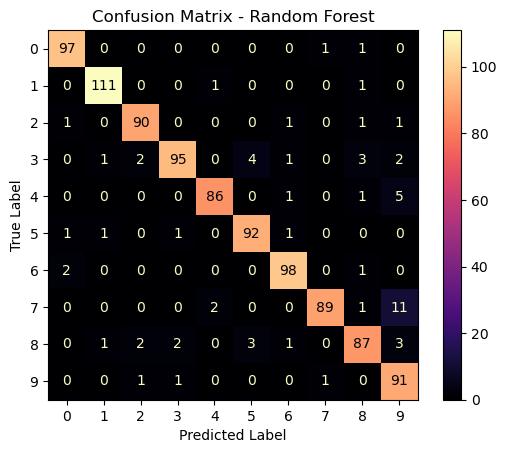

In [59]:
rf_test_predictions = random_forest_clf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_test_predictions)

# Plotta
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(rf_conf_matrix, display_labels=random_forest_clf.classes_).plot(cmap='magma')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [60]:
# 2.  k-NN-modell
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

# Utvärdera på valideringsdata
knn_val_predictions = knn_clf.predict(X_val)
knn_val_accuracy = accuracy_score(y_val, knn_val_predictions)
print(f"k-NN Validation Accuracy: {knn_val_accuracy:.2f}")

knn_test_predictions = knn_clf.predict(X_test)
# Utvärdera prestanda på testdatan
knn_test_accuracy = accuracy_score(y_test, knn_test_predictions)
print(f"k-NN Test Accuracy: {knn_test_accuracy:.2f}")

C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k-NN Validation Accuracy: 0.94
k-NN Test Accuracy: 0.92


<Figure size 800x600 with 0 Axes>

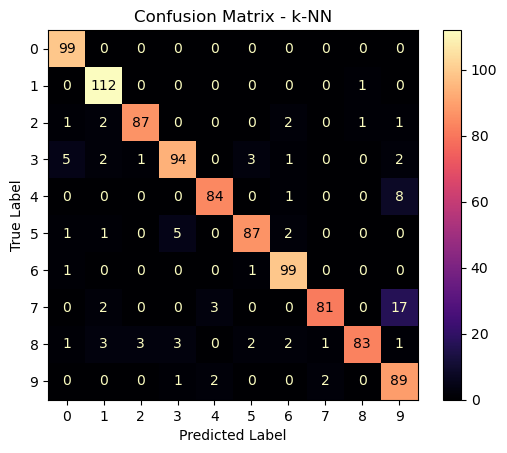

In [61]:
knn_test_predictions = knn_clf.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_test_predictions)

# Plotta
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(knn_conf_matrix, display_labels=knn_clf.classes_).plot(cmap='magma')
plt.title('Confusion Matrix - k-NN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [62]:
# 3. TNeural Network-modell
nn_clf = MLPClassifier(hidden_layer_sizes=(128,), max_iter=20, random_state=42)
nn_clf.fit(X_train, y_train)

# Utvärdera på valideringsdata
nn_val_predictions = nn_clf.predict(X_val)
nn_val_accuracy = accuracy_score(y_val, nn_val_predictions)
print(f"Neural Network Validation Accuracy: {nn_val_accuracy:.2f}")

C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network Validation Accuracy: 0.89


C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

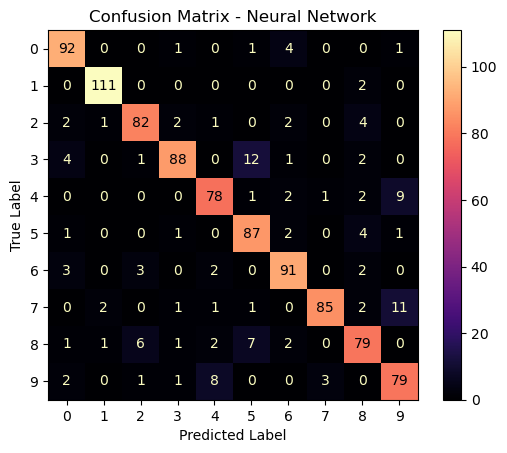

In [63]:
nn_test_predictions = nn_clf.predict(X_test)
nn_conf_matrix = confusion_matrix(y_test, nn_test_predictions)

# Plotta 
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(nn_conf_matrix, display_labels=nn_clf.classes_).plot(cmap='magma')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [64]:
# 4. Skala data för SVM-modeller
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

# 5. Träna SVM-modeller och utvärdera på testdata
models = [
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    SVC(kernel='poly')
]

for model in models:
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model {type(model).__name__} - Accuracy: {accuracy:.2f}")

C:\Users\musta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model SVC - Accuracy: 0.92


C:\Users\musta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model SVC - Accuracy: 0.91


C:\Users\musta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model SVC - Accuracy: 0.82


Model SVC - Accuracy: 0.92
Model SVC - Accuracy: 0.91
Model SVC - Accuracy: 0.82


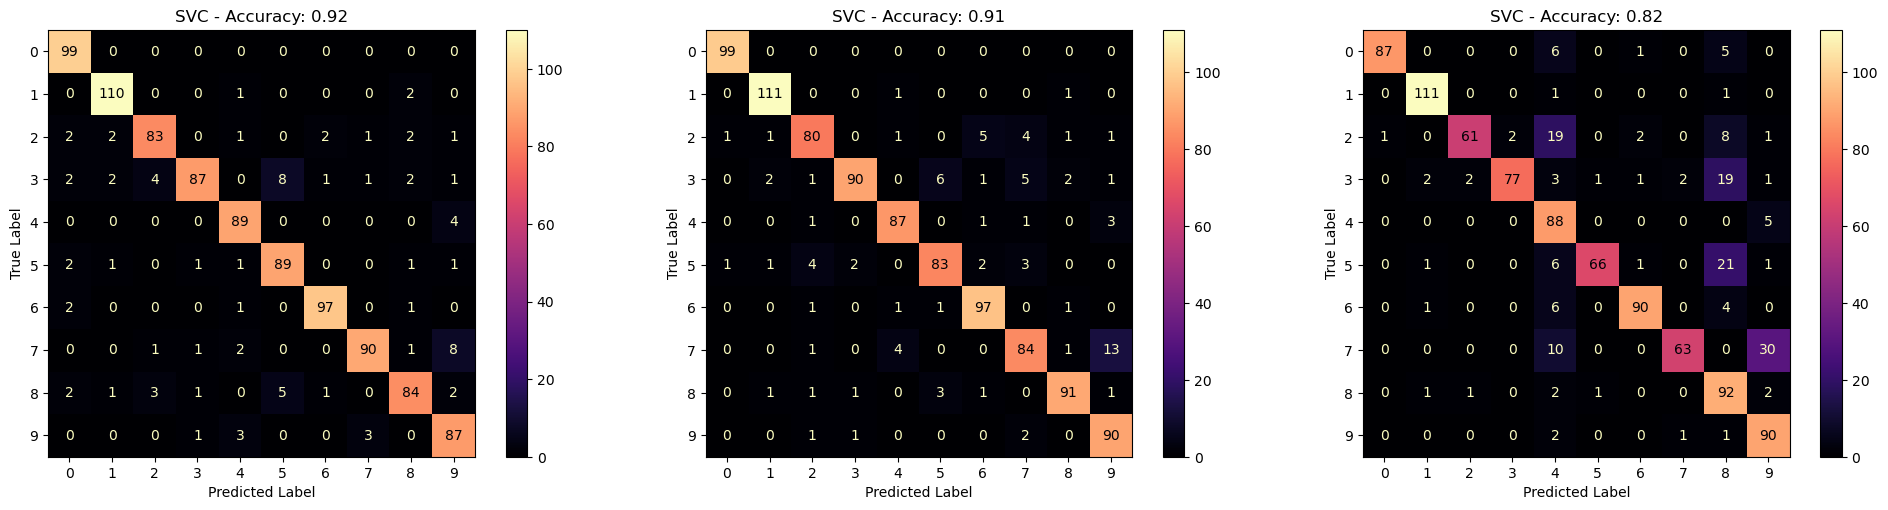

In [65]:
svm_predictions = []
svm_conf_matrices = []

for model in models:
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    
    svm_predictions.append(predictions)
    svm_conf_matrices.append(conf_matrix)
    
    print(f"Model {type(model).__name__} - Accuracy: {accuracy:.2f}")

# Plotta 
fig, axes = plt.subplots(1, len(models), figsize=(20, 5))

for idx, (model, conf_matrix) in enumerate(zip(models, svm_conf_matrices)):
    axes[idx].set_title(f"{type(model).__name__} - Accuracy: {accuracy_score(y_test, svm_predictions[idx]):.2f}")
    ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_).plot(ax=axes[idx], cmap='magma')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

plt.tight_layout()
plt.show()


C:\Users\musta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the o

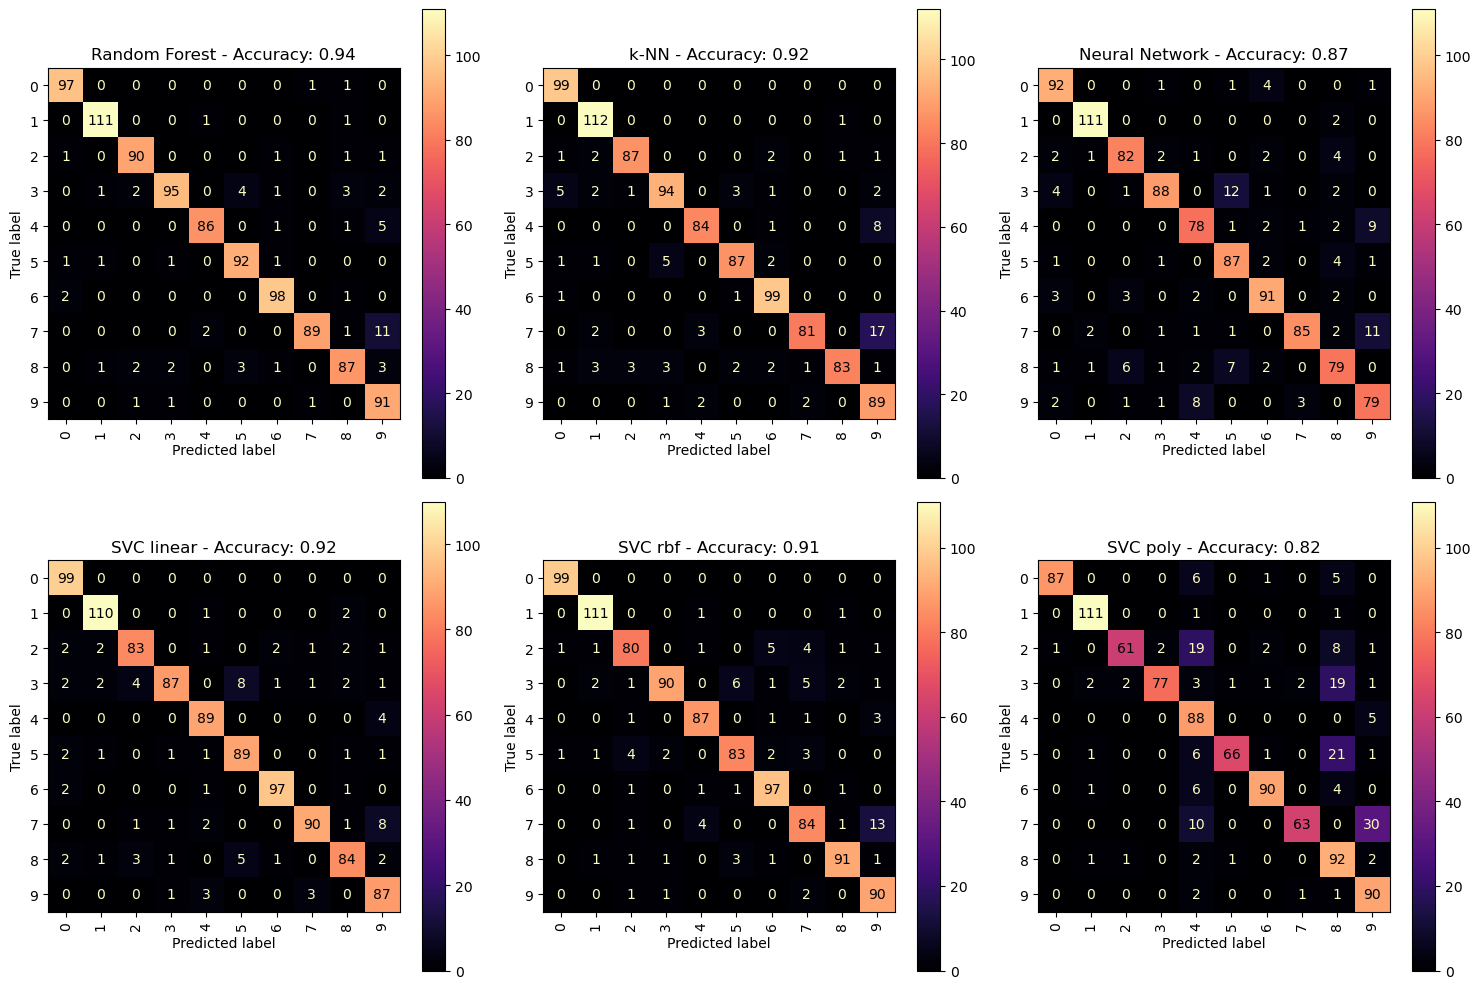

In [66]:
# Förbered data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

# Definiera modeller
models = [
    ("Random Forest", random_forest_clf),
    ("k-NN", knn_clf),
    ("Neural Network", nn_clf),
    ("SVC linear", SVC(kernel='linear')),
    ("SVC rbf", SVC(kernel='rbf')),
    ("SVC poly", SVC(kernel='poly'))
]

# Förbered subplots för att visa förutsägelsematriser
num_models = len(models)
num_cols = 3
num_rows = num_models // num_cols + (1 if num_models % num_cols != 0 else 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Gå igenom varje modell, göra förutsägelser och plotta förutsägelsematris
for idx, (model_name, model) in enumerate(models):
    # Träna modellen om det är nödvändigt
    if "SVC" in model_name:
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)
    
    # Gör förutsägelser på testdatan
    if "SVC" in model_name:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    # Beräkna förutsägelsematris och noggrannhet
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Plotta förutsägelsematris
    row = idx // num_cols
    col = idx % num_cols
    if num_rows == 1:
        ax = axes[col]
    else:
        ax = axes[row, col]
    ax.set_title(f"{model_name} - Accuracy: {accuracy:.2f}")
    ConfusionMatrixDisplay(cm).plot(ax=ax, cmap='magma', xticks_rotation='vertical', values_format='d')

# Justera layout och visa plottarna
plt.tight_layout()
plt.show()


In [21]:

# D parametrarna 
param_grid = [
    {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
    {'n_neighbors': [3, 5, 7]},
    {'hidden_layer_sizes': [(64,), (128,), (256,)], 'max_iter': [20, 50, 100]}
]

# D grid search
models = [
    {'model': RandomForestClassifier(), 'param_grid': param_grid[0]},
    {'model': KNeighborsClassifier(), 'param_grid': param_grid[1]},
    {'model': MLPClassifier(), 'param_grid': param_grid[2]}
]

# inför grid search 
for model_info in models:
    model = model_info['model']
    param_grid = model_info['param_grid']
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {type(model).__name__}: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.2f}")


C:\Users\musta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Best parameters for RandomForestClassifier: {'max_depth': 20, 'n_estimators': 150}
Best cross-validation score: 0.93


C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Best parameters for KNeighborsClassifier: {'n_neighbors': 3}
Best cross-validation score: 0.93


C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

Best parameters for MLPClassifier: {'hidden_layer_sizes': (256,), 'max_iter': 100}
Best cross-validation score: 0.90


In [22]:
# modeller
models = [
    {'model': RandomForestClassifier(n_estimators=100, random_state=42), 'name': 'Random Forest'},
    {'model': KNeighborsClassifier(n_neighbors=3), 'name': 'k-NN'},
    {'model': MLPClassifier(hidden_layer_sizes=(128,), max_iter=20, random_state=42), 'name': 'Neural Network'}
]

# Träna och utvärdera varje modell
for model_info in models:
    model = model_info['model']
    model_name = model_info['name']
    
    # Träna modellen
    model.fit(X_train_scaled, y_train)
    
    # Gör förutsägelser på valideringsdata
    val_predictions = model.predict(X_val_scaled)
    
    # Beräkna noggrannheten
    val_accuracy = accuracy_score(y_val, val_predictions)
    
    # resultatet
    print(f"Validation Accuracy for {model_name}: {val_accuracy:.2f}")


C:\Users\musta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Validation Accuracy for Random Forest: 0.94


C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Validation Accuracy for k-NN: 0.90


C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation Accuracy for Neural Network: 0.93


C:\Users\musta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


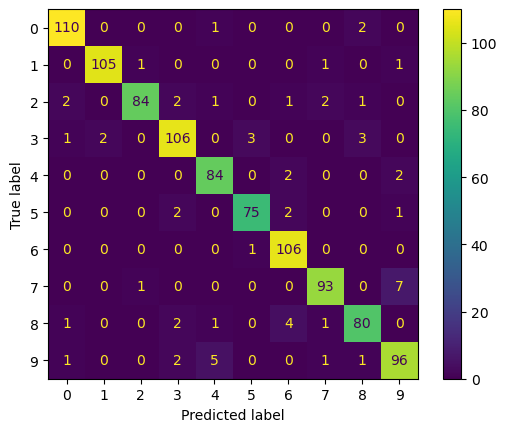

In [23]:
rf_val_conf_matrix = confusion_matrix(y_val, rf_val_predictions)
display_confusion_matrix(y_val, rf_val_predictions)

In [25]:
estimators = [random_forest_clf, knn_clf, nn_clf]

for estimator in estimators:
    score = estimator.score(X_val, y_val)
    print(f"Model {type(estimator).__name__} - Score: {score:.2f}")


Model RandomForestClassifier - Score: 0.94
Model KNeighborsClassifier - Score: 0.94
Model MLPClassifier - Score: 0.89


In [26]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [27]:
from PIL import Image
import cv2


träna på hela data

In [67]:
# Ladda in hela MNIST-datasetet
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# Definiera de bästa hyperparametrarna
best_params = {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}

# RandomForestClassifier med de bästa parametrarna
random_forest_clf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                            max_depth=best_params['max_depth'],
                                            random_state=42)
#TRÄNA 
random_forest_clf.fit(X_train, y_train)
 



C:\Users\musta\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


RandomForestClassifier(max_depth=20, n_estimators=150, random_state=42)

In [68]:
import joblib

# Spara modellen med en korrekt formatterad sökväg
joblib.dump(random_forest_clf, r"C:\Users\musta\EC SKOLAN\ML\random_forest_trained_1.pkl")



['C:\\Users\\musta\\EC SKOLAN\\ML\\random_forest_trained_1.pkl']

In [30]:
#pip show scikit-learn


Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\musta\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


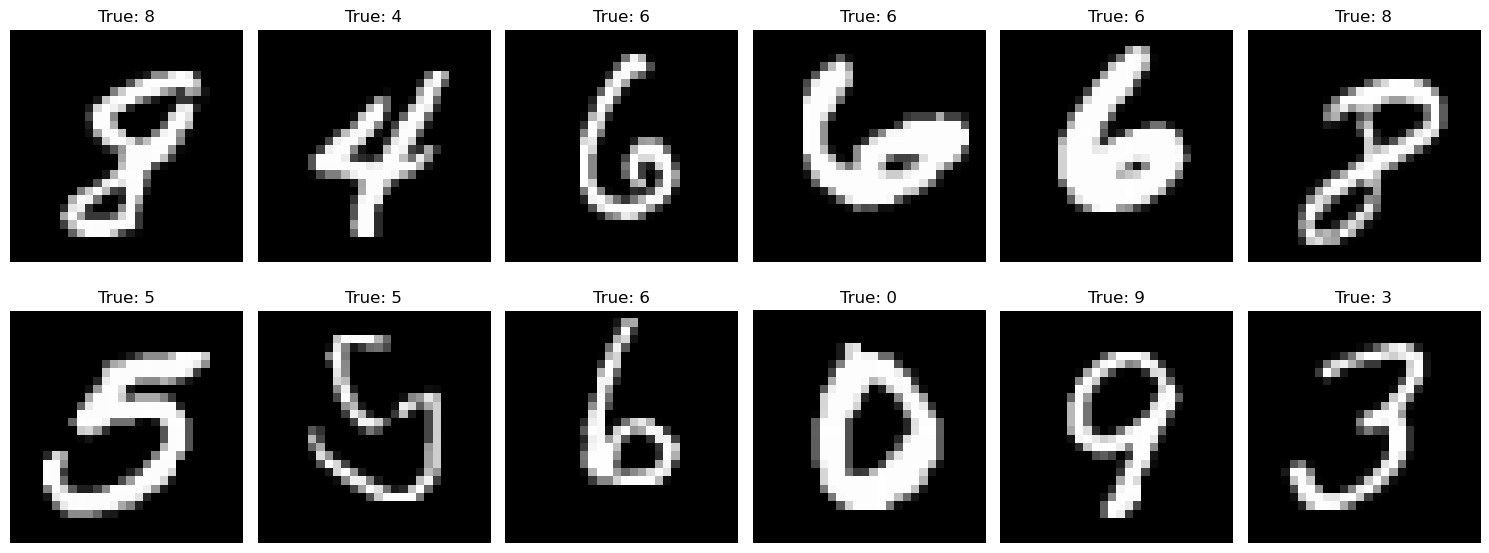

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15., 6.))

for axes_row in axes:
    for ax in axes_row:
        # Slumpmässigt välj en bild och dess sanna etikett från din testuppsättning
        test_index = np.random.randint(0, len(X_test))
        image = X_test[test_index].reshape(28, 28)
        true_label = y_test[test_index]
        
        ax.set_axis_off()
        ax.imshow(image, cmap='gray')
        ax.set_title(f'True: {true_label}')

plt.tight_layout()
plt.show()


In [34]:
# Gör förutsägelser på testdatamängden
predictions = random_forest_clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy on Test Data: {accuracy:.2f}")


Model Accuracy on Test Data: 0.97


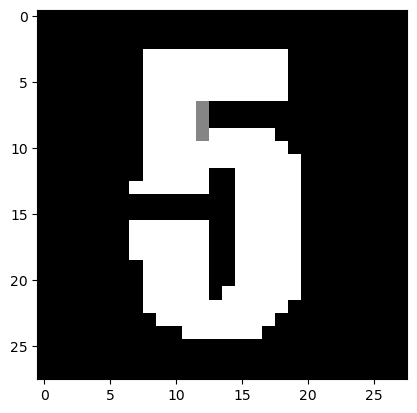

Prediction for your image: [5]


In [43]:

lower_pixel = 100
upper_pixel = 130

image1 = Image.open(r"C:\Users\musta\OneDrive\Skrivbord\bildar\Skärmbild 2024-03-17 092425.png")

#  OpenCV-format
image_test = cv2.cvtColor(np.array(image1), cv2.COLOR_RGB2BGR)  

# ändra storlek
gray_image = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)  
resized_image = cv2.resize(gray_image, (28, 28))  

for i in range(resized_image.shape[0]):
    for j in range(resized_image.shape[1]):
        if resized_image[i, j] <= lower_pixel:
            resized_image[i, j] = 0
        elif resized_image[i, j] > upper_pixel:
            resized_image[i, j] = 255

flattened_image = resized_image.flatten().reshape(1, -1)

# Visa bilden
plt.imshow(resized_image, cmap=mpl.cm.binary)
plt.show()

# Gör en förutsägelse med modellen
prediction = random_forest_clf.predict(flattened_image)

# Visa resultatet
print(f"Prediction for your image: {prediction}")



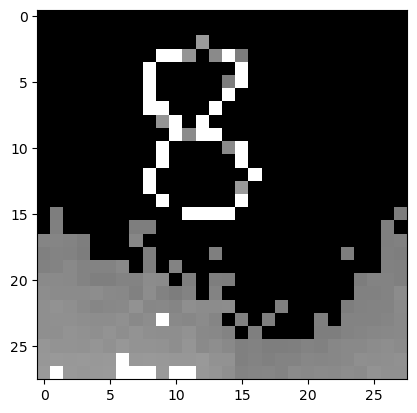

Prediction for your image: [0]


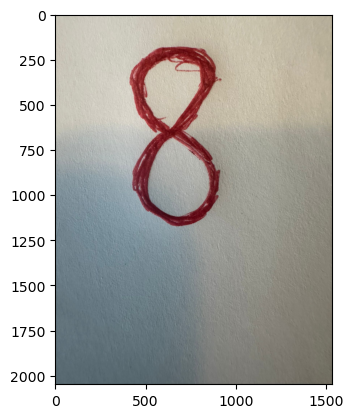

In [112]:
# Definiera tröskelvärden
lower_pixel = 100
upper_pixel = 130


image1 = Image.open(r"C:\Users\musta\Pictures\buu\6 (11).jpg")
image_test = cv2.cvtColor(np.array(image1), cv2.COLOR_RGB2BGR)  

# storlek
gray_image = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)  
resized_image = cv2.resize(gray_image, (28, 28))  

# Applicera
for i in range(resized_image.shape[0]):
    for j in range(resized_image.shape[1]):
        if resized_image[i, j] <= lower_pixel:
            resized_image[i, j] = 0
        elif resized_image[i, j] > upper_pixel:
            resized_image[i, j] = 255

# Gör bilden platt och omforma
flattened_image = resized_image.flatten().reshape(1, -1)

plt.imshow(resized_image, cmap=mpl.cm.binary)
plt.show()

# Gör en förutsägelse med modellen
prediction = random_forest_clf.predict(flattened_image)

# Visa 
print(f"Prediction for your image: {prediction}")


image1 = Image.open(r"C:\Users\musta\Pictures\buu\6 (11).jpg")
plt.imshow(image1)
plt.show()

 

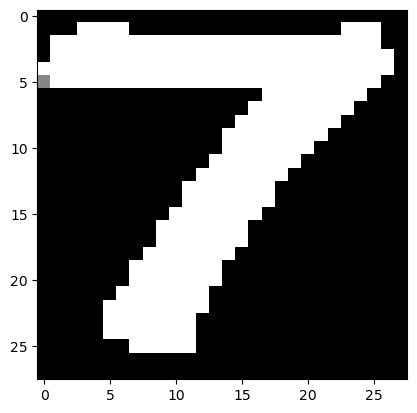

Prediction for your image: [7]


In [100]:
lower_pixel = 100
upper_pixel = 130

image1 = Image.open(r"C:\Users\musta\Pictures\Screenshots\Skärmbild 2024-03-23 110538.png")

# OpenCV-format
image_test = cv2.cvtColor(np.array(image1), cv2.COLOR_RGB2BGR)  

# ändra storlek
gray_image = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)  
resized_image = cv2.resize(gray_image, (28, 28))  

for i in range(resized_image.shape[0]):
    for j in range(resized_image.shape[1]):
        if resized_image[i, j] <= lower_pixel:
            resized_image[i, j] = 0
        elif resized_image[i, j] > upper_pixel:
            resized_image[i, j] = 255


flattened_image = resized_image.flatten().reshape(1, -1)
#visa
plt.imshow(resized_image, cmap=mpl.cm.binary)
plt.show()

prediction = random_forest_clf.predict(flattened_image)

# Visa resultatet
print(f"Prediction for your image: {prediction}")



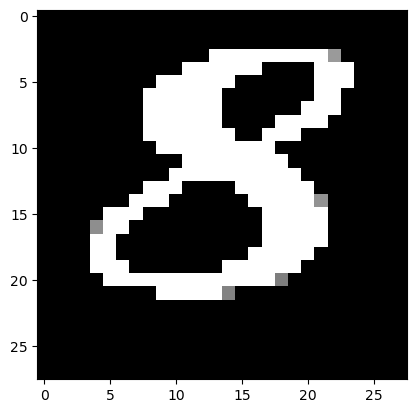

Prediction for your image: [8]


In [103]:
def preprocess_image(image_path, lower_pixel=100, upper_pixel=130):
    # Ladda in bilden och konvertera till gråskala
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Ändra storlek och applicera tröskelvärden
    resized_image = cv2.resize(gray_image, (28, 28))
    for i in range(resized_image.shape[0]):
        for j in range(resized_image.shape[1]):
            if resized_image[i, j] <= lower_pixel:
                resized_image[i, j] = 0
            elif resized_image[i, j] > upper_pixel:
                resized_image[i, j] = 255
    
    # Gör bilden platt och omforma till en rad
    flattened_image = resized_image.flatten().reshape(1, -1)
    return flattened_image, resized_image

def predict_digit(image, model):
    prediction = model.predict(image)
    return prediction

def show_image(image):
    plt.imshow(image, cmap=mpl.cm.binary)
    plt.show()

def main():
    # Definiera tröskelvärden
    lower_pixel = 100
    upper_pixel = 130

    # Ladda in och förbered bilden
    image_path = r"C:\Users\musta\Pictures\Screenshots\8.png"
    flattened_image, resized_image = preprocess_image(image_path)

    # Visa förberedd bild
    show_image(resized_image)

    # Gör förutsägelse med modellen
    prediction = predict_digit(flattened_image, random_forest_clf)

    # Visa resultatet
    print(f"Prediction for your image: {prediction}")

if __name__ == "__main__":
    main()
